# Visualización de Imágenes Seleccionadas - VAL
Este Jupyter Notebook realiza la visualización de un conjunto de imágenes seleccionadas a partir de un archivo CSV que contiene la información de las imágenes, incluyendo la ruta de la imagen y su etiqueta de clase.

El objetivo principal de este Notebook es mostrar una selección de imágenes variadas en cuanto a las clases representadas. Para lograr esto, se utiliza el archivo CSV para identificar las clases únicas y luego se seleccionan un número igual de imágenes de cada clase. Luego, se visualizan las imágenes junto con sus etiquetas de clase correspondientes.

El flujo de trabajo del Notebook se divide en los siguientes bloques:

1. *Lectura del archivo CSV*: Se lee el archivo CSV que contiene la información de las imágenes, incluyendo la ruta de la imagen y su etiqueta de clase.
2. *Selección de imágenes variadas por clase*: Se obtienen las clases únicas presentes en el archivo CSV. A partir de estas clases, se seleccionan un número igual de imágenes de cada clase para lograr una variedad en la visualización.
3. *Visualización de las imágenes seleccionadas*: Se crea una figura con subplots para mostrar las imágenes seleccionadas. Cada imagen se lee desde el directorio de datos concatenando la ruta de la imagen del archivo CSV. Se muestra cada imagen junto con su etiqueta de clase correspondiente.

Este Notebook facilita la exploración y visualización de un conjunto de imágenes seleccionadas, permitiendo obtener una visión general de las clases representadas en el conjunto de datos.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2 # Para corregir el problema de los colores invertidos en las imágenes, se debe utilizar la función cv2.cvtColor()
import os
import random
from math import sqrt

In [11]:
# Ruta del archivo CSV de entrada
csv_path = "../Data/CSVs/validation_dataset_caltech.csv"

### Lectura del archivo CSV

In [12]:
# Cargar los datos del CSV en un DataFrame
df = pd.read_csv(csv_path)

### Proporción de clases

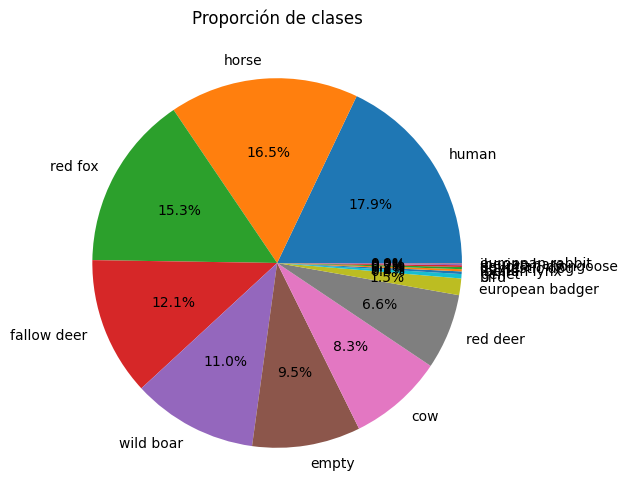

In [13]:
# Crear una figura y ejes solo para el gráfico de tarta de proporción de clases
fig, ax = plt.subplots(figsize=(6, 6))

# Proporción de clases
class_counts = df["class"].value_counts()
ax.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%')
ax.set_title("Proporción de clases")

# Mostrar el gráfico de tarta de proporción de clases
plt.show()

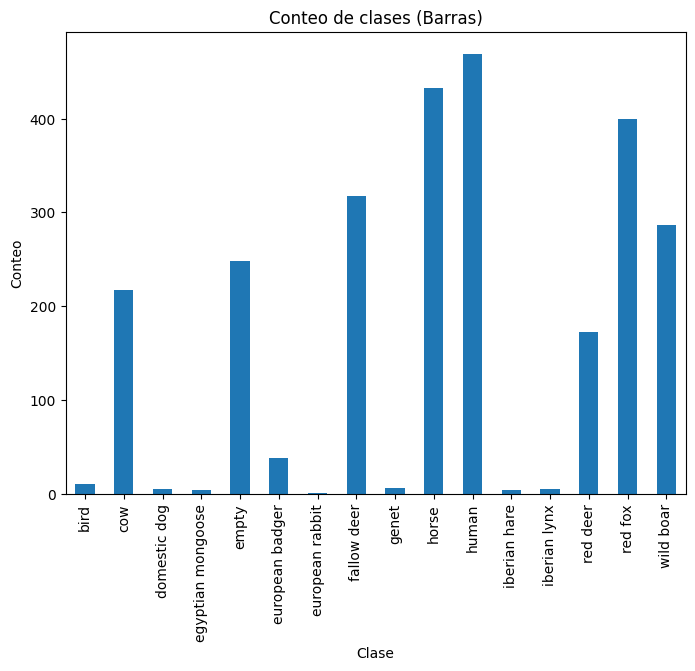

In [14]:
# Create a figure and axis for the bar chart
fig, ax = plt.subplots(figsize=(8, 6))

# Count class occurrences and sort alphabetically
class_counts = df["class"].value_counts().sort_index()

# Plot the bar chart for class counts
class_counts.plot(kind="bar", ax=ax)
ax.set_xlabel("Clase")
ax.set_ylabel("Conteo")
ax.set_title("Conteo de clases (Barras)")

# Show the bar chart
plt.show()

### Proporción de clases sin Empty

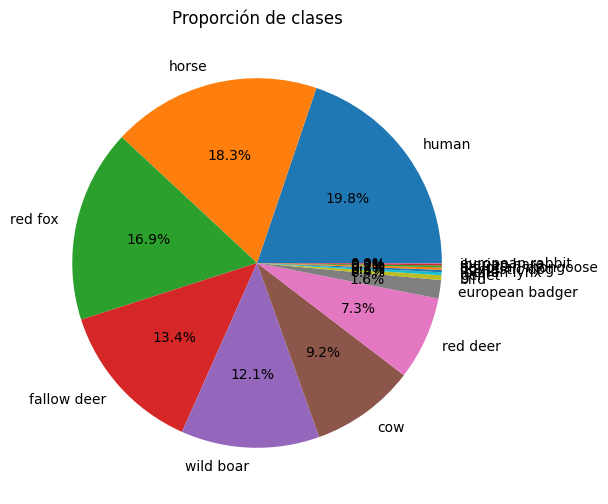

In [15]:
# Filtrar el DataFrame para excluir la clase "empty"
filtered_df = df[df["class"] != "empty"]

# Crear una figura y ejes solo para el gráfico de tarta de proporción de clases
fig, ax = plt.subplots(figsize=(6, 6))

# Proporción de clases (usando el DataFrame filtrado)
class_counts = filtered_df["class"].value_counts()
ax.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%')
ax.set_title("Proporción de clases")

# Mostrar el gráfico de tarta de proporción de clases
plt.show()

### Gráficos de forma general

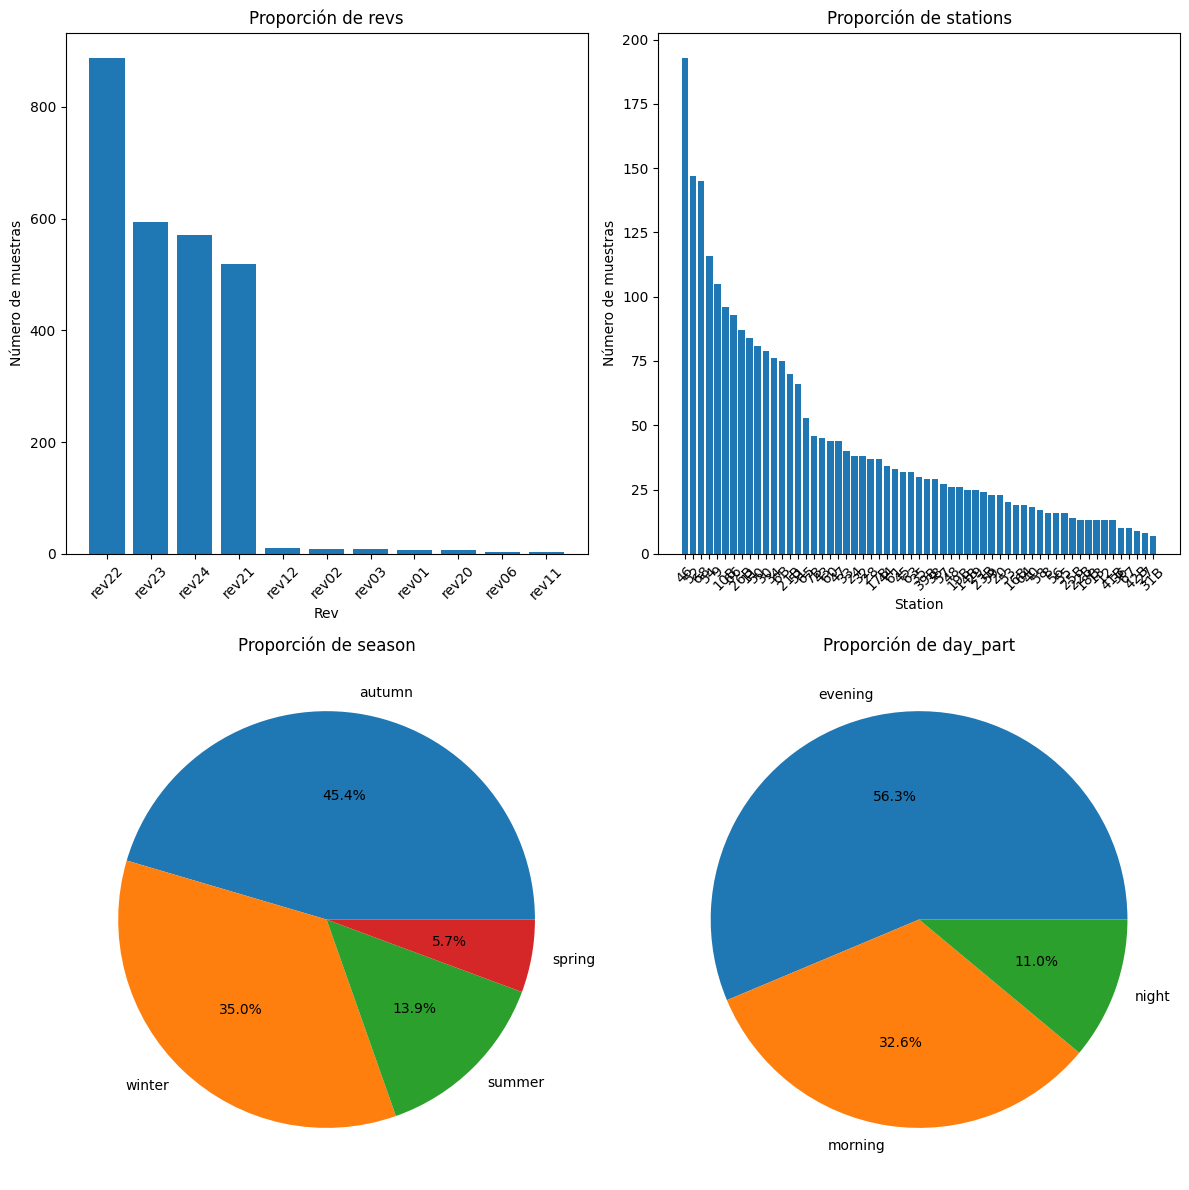

In [16]:
# Crear una figura y ejes para los subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Proporción de revs (gráfico de barras)
rev_counts = df["rev"].value_counts()
axes[0, 0].bar(rev_counts.index, rev_counts.values)
axes[0, 0].set_xlabel("Rev")
axes[0, 0].set_ylabel("Número de muestras")
axes[0, 0].set_title("Proporción de revs")
axes[0, 0].tick_params(axis='x', rotation=45)

# Proporción de stations (gráfico de barras)
station_counts = df["station"].value_counts()
axes[0, 1].bar(station_counts.index, station_counts.values)
axes[0, 1].set_xlabel("Station")
axes[0, 1].set_ylabel("Número de muestras")
axes[0, 1].set_title("Proporción de stations")
axes[0, 1].tick_params(axis='x', rotation=45)

# Proporción de season
season_counts = df["season"].value_counts()
axes[1, 0].pie(season_counts.values, labels=season_counts.index, autopct='%1.1f%%')
axes[1, 0].set_title("Proporción de season")

# Proporción de day_part (gráfico de tarta)
day_part_counts = df["day_part"].value_counts()
axes[1, 1].pie(day_part_counts.values, labels=day_part_counts.index, autopct='%1.1f%%')
axes[1, 1].set_title("Proporción de day_part")

# Ajustar la disposición de los subplots y mostrar la figura
fig.tight_layout()
plt.show()

#### Sin Empty

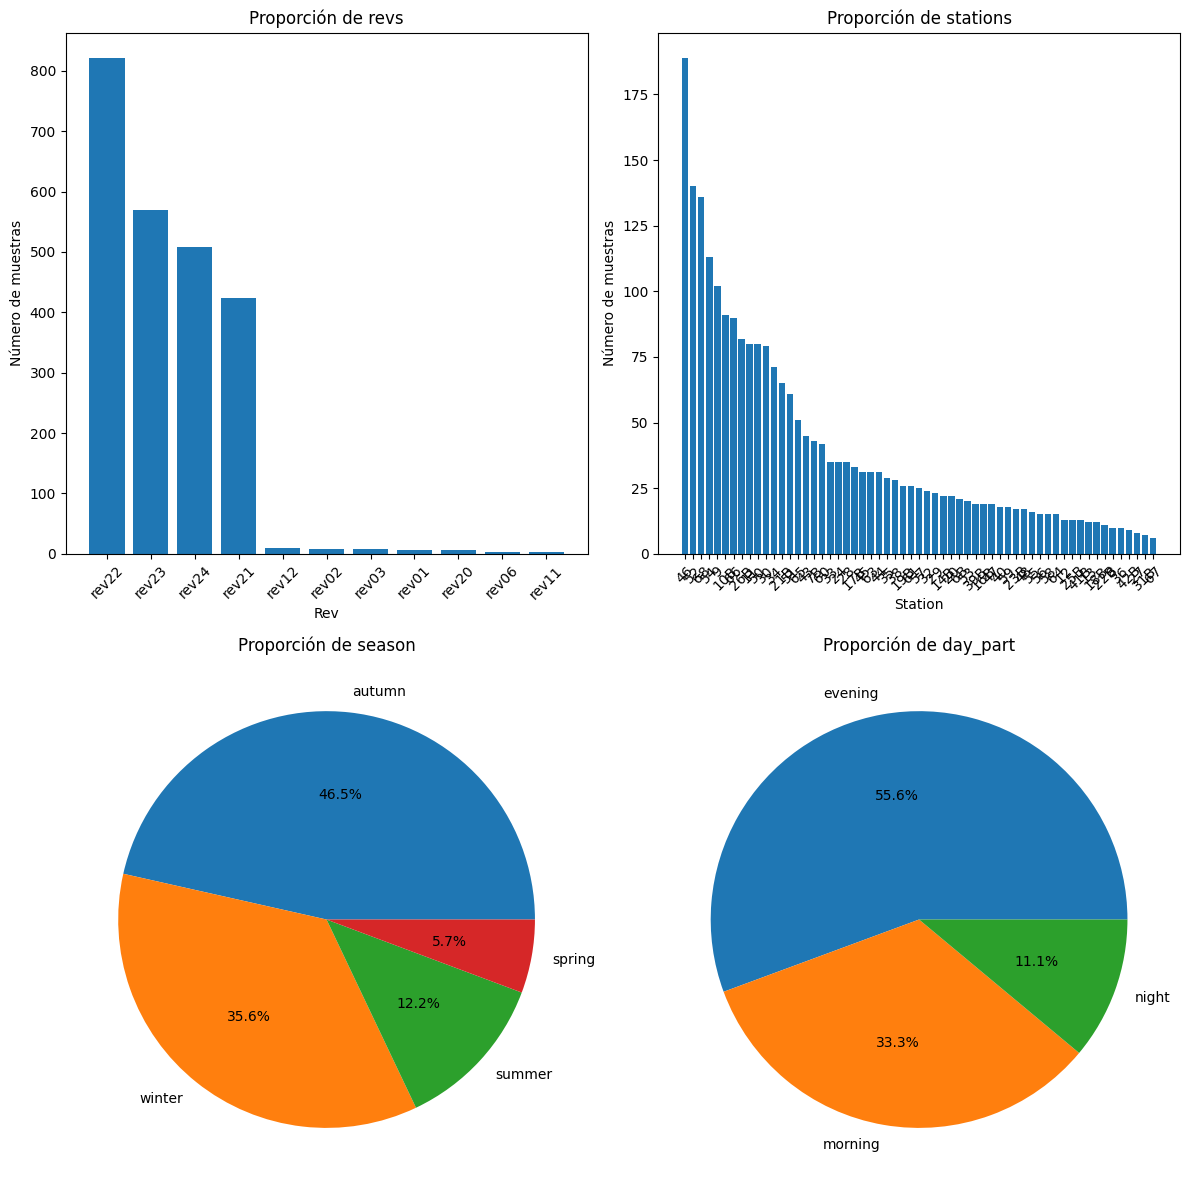

In [17]:
# Filtrar el DataFrame para excluir la clase "empty"
filtered_df = df[df["class"] != "empty"]

# Crear una figura y ejes para los subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Proporción de revs (gráfico de barras)
rev_counts = filtered_df["rev"].value_counts()
axes[0, 0].bar(rev_counts.index, rev_counts.values)
axes[0, 0].set_xlabel("Rev")
axes[0, 0].set_ylabel("Número de muestras")
axes[0, 0].set_title("Proporción de revs")
axes[0, 0].tick_params(axis='x', rotation=45)

# Proporción de stations (gráfico de barras)
station_counts = filtered_df["station"].value_counts()
axes[0, 1].bar(station_counts.index, station_counts.values)
axes[0, 1].set_xlabel("Station")
axes[0, 1].set_ylabel("Número de muestras")
axes[0, 1].set_title("Proporción de stations")
axes[0, 1].tick_params(axis='x', rotation=45)

# Proporción de season
season_counts = filtered_df["season"].value_counts()
axes[1, 0].pie(season_counts.values, labels=season_counts.index, autopct='%1.1f%%')
axes[1, 0].set_title("Proporción de season")

# Proporción de day_part (gráfico de tarta)
day_part_counts = filtered_df["day_part"].value_counts()
axes[1, 1].pie(day_part_counts.values, labels=day_part_counts.index, autopct='%1.1f%%')
axes[1, 1].set_title("Proporción de day_part")

# Ajustar la disposición de los subplots y mostrar la figura
fig.tight_layout()
plt.show()


### Visualización por clase

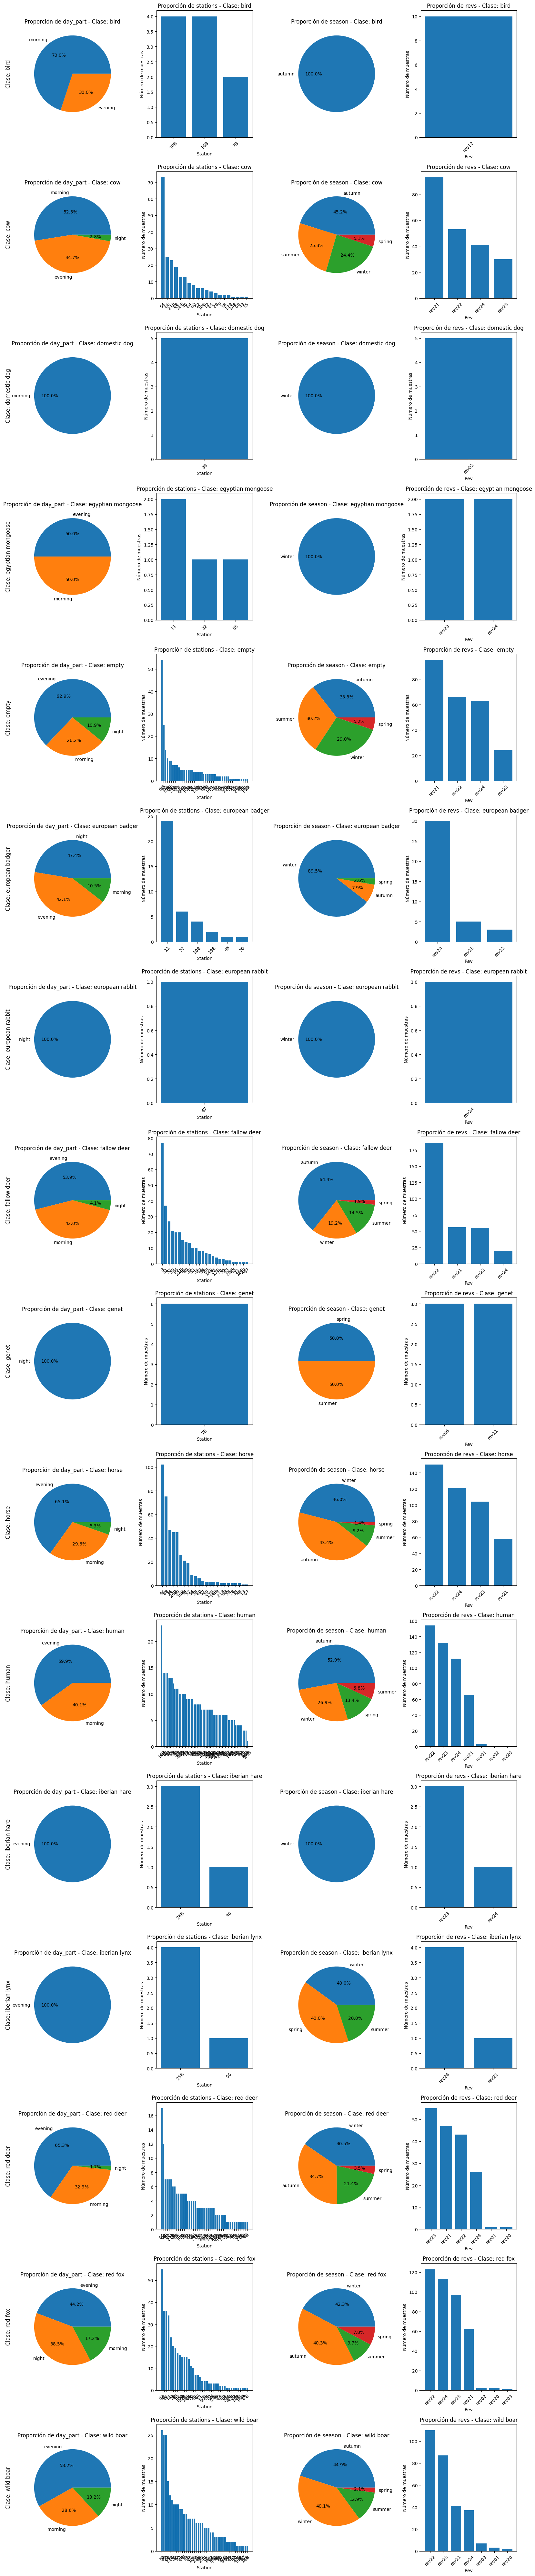

In [18]:
# Obtener las clases únicas del DataFrame
clases = df["class"].unique()
clases.sort()

# Calcular el número de filas y columnas para los subplots
num_rows = len(clases)
num_cols = 4

# Calcular el tamaño de la figura en función del número de subplots
fig_width = 16
fig_height = 5 * num_rows

# Crear la figura y los ejes para los subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

# Ajustar el espacio entre los subplots
fig.subplots_adjust(wspace=0.5)

# Iterar sobre las clases y generar los gráficos correspondientes
for i, clase in enumerate(clases):
    # Calcular las proporciones para cada clase
    rev_counts = df[df["class"] == clase]["rev"].value_counts()
    station_counts = df[df["class"] == clase]["station"].value_counts()
    season_counts = df[df["class"] == clase]["season"].value_counts()
    day_part_counts = df[df["class"] == clase]["day_part"].value_counts()

    # Obtener los ejes correspondientes a la fila actual
    ax_row = i
    ax = axes[ax_row]

    # Agregar el título de la clase antes de los gráficos en cada fila
    ax[0].text(-0.2, 0.5, f"Clase: {clase}", fontsize=12, transform=ax[0].transAxes, rotation=90, verticalalignment='center')

    # Graficar la proporción de day_part (gráfico de tarta)
    ax[0].pie(day_part_counts.values, labels=day_part_counts.index, autopct='%1.1f%%')
    ax[0].set_title(f"Proporción de day_part - Clase: {clase}")

    # Graficar la proporción de stations (gráfico de barras)
    ax[1].bar(station_counts.index, station_counts.values)
    ax[1].set_xlabel("Station")
    ax[1].set_ylabel("Número de muestras")
    ax[1].set_title(f"Proporción de stations - Clase: {clase}")
    ax[1].tick_params(axis='x', rotation=45)

    # Graficar la proporción de season (gráfico de tarta)
    ax[2].pie(season_counts.values, labels=season_counts.index, autopct='%1.1f%%')
    ax[2].set_title(f"Proporción de season - Clase: {clase}")

    # Graficar la proporción de revs (gráfico de barras)
    ax[3].bar(rev_counts.index, rev_counts.values)
    ax[3].set_xlabel("Rev")
    ax[3].set_ylabel("Número de muestras")
    ax[3].set_title(f"Proporción de revs - Clase: {clase}")
    ax[3].tick_params(axis='x', rotation=45)

# Ajustar la disposición de los subplots y mostrar la figura
fig.tight_layout()
plt.show()
